## Intro to using beautiful soup to scrape web football data

### Install Beautiful Soup

In [3]:
pip install beautifulsoup4


## We will now want to import all the necessary packages require for scraping and analysis:

In [4]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import numpy as np
from math import pi

In [5]:
def get_player_data(x):
    warnings.filterwarnings("ignore")
    url = x
    page =requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    name = [element.text for element in soup.find_all("span")]
    name = name[7]
    metric_names = []
    metric_values = []
    remove_content = ["'", "[", "]", ","]
    for row in soup.findAll('table')[0].tbody.findAll('tr'):
        first_column = row.findAll('th')[0].contents
        metric_names.append(first_column)
    for row in soup.findAll('table')[0].tbody.findAll('tr'):
        first_column = row.findAll('td')[0].contents
        metric_values.append(first_column)

    metric_names = [item for sublist in metric_names for item in sublist]
    metric_values = [item for sublist in metric_values for item in sublist]
    df_player = pd.DataFrame()
    df_player['Name'] = name[0]
    for item in metric_names:
        df_player[item] = []

    name = name
    non_penalty_goals = (metric_values[0])
    npx_g = metric_values[1]
    shots_total = metric_values[2]
    assists = metric_values[3]
    x_a = metric_values[4]
    npx_g_plus_x_a = metric_values[5] 
    shot_creating_actions = metric_values[6] 
    passes_attempted = metric_values[7] 
    pass_completion_percent = metric_values[8] 
    progressive_passes = metric_values[9] 
    progressive_carries = metric_values[10] 
    dribbles_completed = metric_values[11] 
    touches_att_pen = metric_values[12]
    progressive_passes_rec = metric_values[13] 
    pressures = metric_values[14] 
    tackles = metric_values[15] 
    interceptions = metric_values[16] 
    blocks = metric_values[17]
    clearances = metric_values[18]
    aerials_won = metric_values[19]
    df_player.loc[0] = [name, non_penalty_goals, npx_g, shots_total, assists, x_a, npx_g_plus_x_a, shot_creating_actions, passes_attempted, pass_completion_percent,
                        progressive_passes, progressive_carries, dribbles_completed, touches_att_pen, progressive_passes_rec, pressures, tackles, interceptions, blocks,
                        clearances, aerials_won] 
    return df_player

In [6]:
get_player_data("https://fbref.com/en/players/bc7dc64d/Bukayo-Saka")

,Name,Non-Penalty Goals,npxG,Shots Total,Assists,xA,npxG+xA,Shot-Creating Actions,Passes Attempted,Pass Completion %,...,Progressive Carries,Dribbles Completed,Touches (Att Pen),Progressive Passes Rec,Pressures,Tackles,Interceptions,Blocks,Clearances,Aerials won
0,Bukayo Saka,0.31,0.21,2.32,0.18,0.22,0.42,3.91,37.95,75.1%,...,8.06,1.59,6.75,7.91,14.07,1.10,0.98,1.13,0.73,0.70


In [7]:
def get_player_multi_data(url_list:list):
    appended_data = []
    for url in url_list:
        warnings.filterwarnings("ignore")
        page =requests.get(url)
        soup = BeautifulSoup(page.content, 'html.parser')
        name = [element.text for element in soup.find_all("span")]
        name = name[7]
        metric_names = []
        metric_values = []
        remove_content = ["'", "[", "]", ","]
        for row in soup.findAll('table')[0].tbody.findAll('tr'):
            first_column = row.findAll('th')[0].contents
            metric_names.append(first_column)
        for row in soup.findAll('table')[0].tbody.findAll('tr'):
            first_column = row.findAll('td')[0].contents
            metric_values.append(first_column)

        metric_names = [item for sublist in metric_names for item in sublist]
        metric_values = [item for sublist in metric_values for item in sublist]

        df_player = pd.DataFrame()
        df_player['Name'] = name[0]
        for item in metric_names:
            df_player[item] = []

        name = name
        non_penalty_goals = (metric_values[0])
        npx_g = metric_values[1]
        shots_total = metric_values[2]
        assists = metric_values[3]
        x_a = metric_values[4]
        npx_g_plus_x_a = metric_values[5] 
        shot_creating_actions = metric_values[6] 
        passes_attempted = metric_values[7] 
        pass_completion_percent = metric_values[8] 
        progressive_passes = metric_values[9] 
        progressive_carries = metric_values[10] 
        dribbles_completed = metric_values[11] 
        touches_att_pen = metric_values[12]
        progressive_passes_rec = metric_values[13] 
        pressures = metric_values[14] 
        tackles = metric_values[15] 
        interceptions = metric_values[16] 
        blocks = metric_values[17]
        clearances = metric_values[18]
        aerials_won = metric_values[19]
        df_player.loc[0] = [name, non_penalty_goals, npx_g, shots_total, assists, x_a, npx_g_plus_x_a, shot_creating_actions, passes_attempted, pass_completion_percent,
                            progressive_passes, progressive_carries, dribbles_completed, touches_att_pen, progressive_passes_rec, pressures, tackles, interceptions, blocks,
                            clearances, aerials_won]
        appended_data.append(df_player)
    appended_data = pd.concat(appended_data)
    return appended_data

In [39]:
url_list = ["https://fbref.com/en/players/bc7dc64d/Bukayo-Saka","https://fbref.com/en/players/ed1e53f3/Phil-Foden","https://fbref.com/en/players/9674002f/Mason-Mount","https://fbref.com/en/players/17695062/Emile-Smith-Rowe"]


In [16]:
# url_list = ["https://fbref.com/en/players/59e6e5bf/Dominic-Calvert-Lewin","https://fbref.com/en/players/ce50fd99/Jonathan-David","https://fbref.com/en/players/8e92be30/Alexander-Isak"]


In [40]:
get_player_multi_data(url_list)

,Name,Non-Penalty Goals,npxG,Shots Total,Assists,xA,npxG+xA,Shot-Creating Actions,Passes Attempted,Pass Completion %,...,Progressive Carries,Dribbles Completed,Touches (Att Pen),Progressive Passes Rec,Pressures,Tackles,Interceptions,Blocks,Clearances,Aerials won
0,Bukayo Saka,0.31,0.21,2.32,0.18,0.22,0.42,3.91,37.95,75.1%,...,8.06,1.59,6.75,7.91,14.07,1.10,0.98,1.13,0.73,0.70
0,Phil Foden,0.47,0.45,2.84,0.17,0.25,0.69,3.41,49.04,81.9%,...,6.46,1.45,6.52,8.21,18.96,1.08,0.78,0.84,0.20,0.34
0,Mason Mount,0.29,0.30,2.55,0.32,0.28,0.58,4.18,47.98,78.7%,...,6.79,0.97,5.44,7.64,20.86,1.70,0.70,0.97,0.29,0.41
0,Emile Smith Rowe,0.42,0.23,1.66,0.12,0.12,0.35,2.74,38.69,86.6%,...,6.13,1.35,2.93,4.51,12.54,0.85,1.00,0.85,0.66,0.31


In [41]:
def generate_player_comparison(url_list, view):
    df_player_comp = get_player_multi_data(url_list)

    def p2f(x):
        return float(x.strip('%'))/100

    df_player_comp["Pass Completion %"] = df_player_comp["Pass Completion %"].apply(p2f)

    df_player_comp[['Non-Penalty Goals', 'npxG', 'Shots Total', 'Assists', 'xA',
        'npxG+xA', 'Shot-Creating Actions', 'Passes Attempted',
        'Pass Completion %', 'Progressive Passes', 'Progressive Carries',
        'Dribbles Completed', 'Touches (Att Pen)', 'Progressive Passes Rec',
        'Pressures', 'Tackles', 'Interceptions', 'Blocks', 'Clearances',
        'Aerials won']] = df_player_comp[['Non-Penalty Goals', 'npxG', 'Shots Total', 'Assists', 'xA',
        'npxG+xA', 'Shot-Creating Actions', 'Passes Attempted',
        'Pass Completion %', 'Progressive Passes', 'Progressive Carries',
        'Dribbles Completed', 'Touches (Att Pen)', 'Progressive Passes Rec',
        'Pressures', 'Tackles', 'Interceptions', 'Blocks', 'Clearances',
        'Aerials won']].apply(pd.to_numeric)

    df_player_comp_attacking= df_player_comp[['Name','Non-Penalty Goals', 'npxG', 'Shots Total','xA','npxG+xA']]
    
    df_player_comp_playmaking= df_player_comp[['Name','Assists','Dribbles Completed',
         'Touches (Att Pen)', 'Progressive Passes Rec','Passes Attempted',
        'Pass Completion %', 'Progressive Passes', 'Progressive Carries','Shot-Creating Actions']]

    df_player_comp_defensive= df_player_comp[['Name','Aerials won','Pressures', 'Tackles', 'Interceptions', 'Blocks']]
    
    if view == "attack":
        fig, ax =plt.subplots(1,3, figsize=(27,6))
        sb.barplot(df_player_comp_attacking['Name'], df_player_comp_attacking['Non-Penalty Goals'], ax=ax[0]).set(title='Non Penalty Goals')
        sb.barplot(df_player_comp_attacking['Name'], df_player_comp_attacking['npxG'], ax=ax[1]).set(title='Non Penalty xG')
        sb.barplot(df_player_comp_attacking['Name'], df_player_comp_attacking['Shots Total'], ax=ax[2]).set(title='Total Shots')
    elif view == "playmaking":
        fig, ax =plt.subplots(1,4, figsize=(27,6))
        sb.barplot(df_player_comp_playmaking['Name'], df_player_comp_playmaking['Assists'], ax=ax[0]).set(title='Assists')
        sb.barplot(df_player_comp_playmaking['Name'], df_player_comp_playmaking['Dribbles Completed'], ax=ax[1]).set(title='Dribbles Completed')
        sb.barplot(df_player_comp_playmaking['Name'], df_player_comp_playmaking['Touches (Att Pen)'], ax=ax[2]).set(title='Touches in Pen Area')
        sb.barplot(df_player_comp_playmaking['Name'], df_player_comp_playmaking['Shot-Creating Actions'], ax=ax[3]).set(title='Shot-Creating Actions')
    elif view == "defensive":
        fig, ax =plt.subplots(1,5, figsize=(36,8))
        sb.barplot(df_player_comp_defensive['Name'], df_player_comp_defensive['Aerials won'], ax=ax[0]).set(title='Aerials Won')
        sb.barplot(df_player_comp_defensive['Name'], df_player_comp_defensive['Pressures'], ax=ax[1]).set(title='Pressures')
        sb.barplot(df_player_comp_defensive['Name'], df_player_comp_defensive['Tackles'], ax=ax[2]).set(title='Tackles')
        sb.barplot(df_player_comp_defensive['Name'], df_player_comp_defensive['Interceptions'], ax=ax[3]).set(title='Interceptions')
        sb.barplot(df_player_comp_defensive['Name'], df_player_comp_defensive['Blocks'], ax=ax[4]).set(title='Blocks')
    else: 
        print('Please check your spelling. options are: attack, playmaking or defensive')

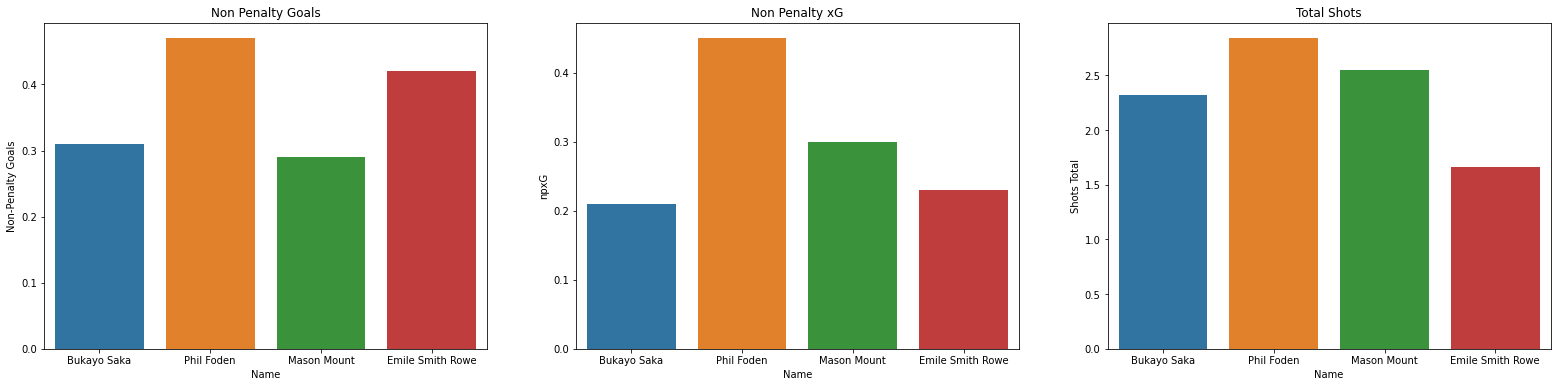

In [42]:
generate_player_comparison(url_list, "attack")

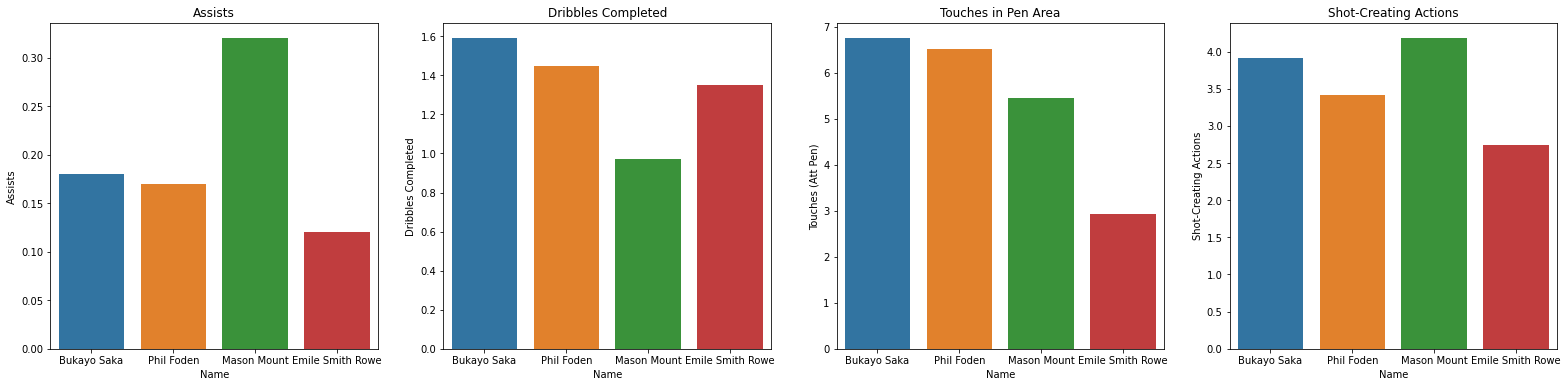

In [43]:
generate_player_comparison(url_list, "playmaking")

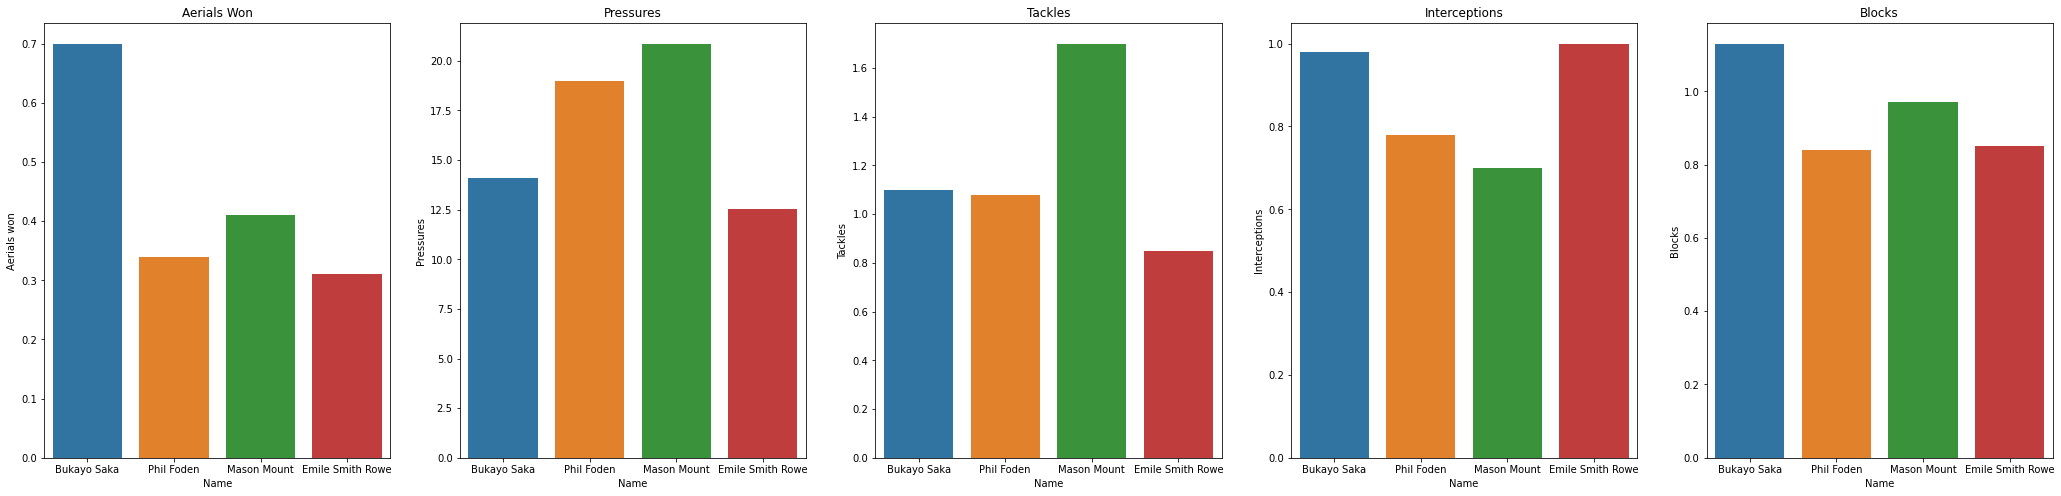

In [29]:
generate_player_comparison(url_list, "defensive")

In [31]:
url_list = ['https://fbref.com/en/players/ed1e53f3/Phil-Foden','https://fbref.com/en/players/bc7dc64d/Bukayo-Saka']

In [32]:
def compare_players_percentile(x):
    appended_data = []
    for x in url_list:

        warnings.filterwarnings("ignore")
        
        url = x
        page =requests.get(url)
        soup= BeautifulSoup(page.content, 'html.parser')
        name = [element.text for element in soup.find_all("span")]
        name = name[7]
        
        metric_names = []
        metric_values = []
        
        
        remove_content = ["'", "[", "]", ",", "%"]
        
        for row in soup.findAll('table')[0].tbody.findAll('tr'):
            first_column = row.findAll('th')[0].contents
            metric_names.append(first_column)
            
            
        for row in soup.findAll('table')[0].tbody.findAll('tr'):
            first_column = row.findAll('td')[1].contents
            metric_values.append(first_column)
            
            
        clean_left = []
        splitat_r = 65
        splitat_l = 67

        for item in metric_values:
            item = str(item).strip('[]')
            left, right = item[:splitat_l], item[splitat_r:]
            clean_left.append(left)

        clean_overall= []
        
        for item in clean_left:
            item = str(item).strip('[]')
            left, right = item[:splitat_l], item[splitat_r:]
            clean_overall.append(right)
        
        clean = []
        
        for item in clean_overall:
            item = item.replace("<","")
            clean.append(item)
            
        metric_names  = [item for sublist in metric_names  for item in sublist]

        clean = list(filter(None, clean))

            
        df_player = pd.DataFrame()
        
        
        df_player['Name'] = name[0]
        for item in metric_names:
            df_player[item] = []


        name = name
        non_penalty_goals = (clean[0])
        npx_g = clean[1]
        shots_total = clean[2]
        assists = clean[3]
        x_a = clean[4]
        npx_g_plus_x_a = clean[5] 
        shot_creating_actions = clean[6] 
        passes_attempted = clean[7] 
        pass_completion_percent = clean[8] 
        progressive_passes = clean[9] 
        progressive_carries = clean[10] 
        dribbles_completed = clean[11] 
        touches_att_pen = clean[12]
        progressive_passes_rec = clean[13] 
        pressures = clean[14] 
        tackles = clean[15] 
        interceptions = clean[16] 
        blocks = clean[17]
        clearances = clean[18]
        aerials_won = clean[19]
        df_player.loc[0] = [name, non_penalty_goals, npx_g, shots_total, assists, x_a, npx_g_plus_x_a, shot_creating_actions, passes_attempted, pass_completion_percent,
                            progressive_passes, progressive_carries, dribbles_completed, touches_att_pen, progressive_passes_rec, pressures, tackles, interceptions, blocks,
                            clearances, aerials_won]
        appended_data.append(df_player)

    df_player_comp = pd.concat(appended_data)

    df_player_comp[['Non-Penalty Goals', 'npxG', 'Shots Total', 'Assists', 'xA',
            'npxG+xA', 'Shot-Creating Actions', 'Passes Attempted',
            'Pass Completion %', 'Progressive Passes', 'Progressive Carries',
            'Dribbles Completed', 'Touches (Att Pen)', 'Progressive Passes Rec',
            'Pressures', 'Tackles', 'Interceptions', 'Blocks', 'Clearances',
            'Aerials won']] = df_player_comp[['Non-Penalty Goals', 'npxG', 'Shots Total', 'Assists', 'xA',
            'npxG+xA', 'Shot-Creating Actions', 'Passes Attempted',
            'Pass Completion %', 'Progressive Passes', 'Progressive Carries',
            'Dribbles Completed', 'Touches (Att Pen)', 'Progressive Passes Rec',
            'Pressures', 'Tackles', 'Interceptions', 'Blocks', 'Clearances',
            'Aerials won']].apply(pd.to_numeric)
        
    categories = ['Non-Penalty Goals', 'npxG', 'Shots Total', 'Assists', 'xA',
        'npxG+xA', 'Shot-Creating Actions', 'Passes Attempted',
        'Pass Completion %', 'Progressive Passes', 'Progressive Carries',
        'Dribbles Completed', 'Touches (Att Pen)', 'Progressive Passes Rec',
        'Pressures', 'Tackles', 'Interceptions', 'Blocks', 'Clearances',
        'Aerials won']



    df_player_plot_1 = df_player_comp.reset_index(drop=True)

    df_player_plot_1 = df_player_plot_1.iloc[0].values.tolist()
    player_1_name = df_player_plot_1[0]
    del df_player_plot_1[0]

    df_player_plot_2 = df_player_comp.reset_index(drop=True)
    df_player_plot_2 = df_player_plot_2.iloc[1].values.tolist()
    player_2_name = df_player_plot_2[0]
    del df_player_plot_2[0]

    df_player_1_plot = df_player_plot_1

    df_player_2_plot = df_player_plot_2

    df_player_1_plot_numeric = []
        
    for item in df_player_1_plot:
        item = int(item)
        df_player_1_plot_numeric.append(item)
        
    df_player_2_plot_numeric = []

    for item in df_player_2_plot:
        item = int(item)
        df_player_2_plot_numeric.append(item)    

    N = 20

    angles = [n / float(N) * 2 * pi for n in range(N)]

    plt.figure(figsize=(40,10))

    ax = plt.subplot(111, polar=True)

    ax.set_theta_offset(pi / 2)

    ax.set_theta_direction(-1)

    plt.xticks(angles[:], categories)

    a = df_player_1_plot_numeric
    b = df_player_2_plot_numeric

    ax.plot(angles, a, linewidth=1, linestyle='solid', label=player_1_name, color ='blue')
    ax.fill(angles, a, 'b', alpha=0.3, color ='blue')

    ax.plot(angles, b, linewidth=1, linestyle='solid', label=player_2_name, color ='green')
    ax.fill(angles, b, 'b', alpha=0.3, color ='green')
        
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

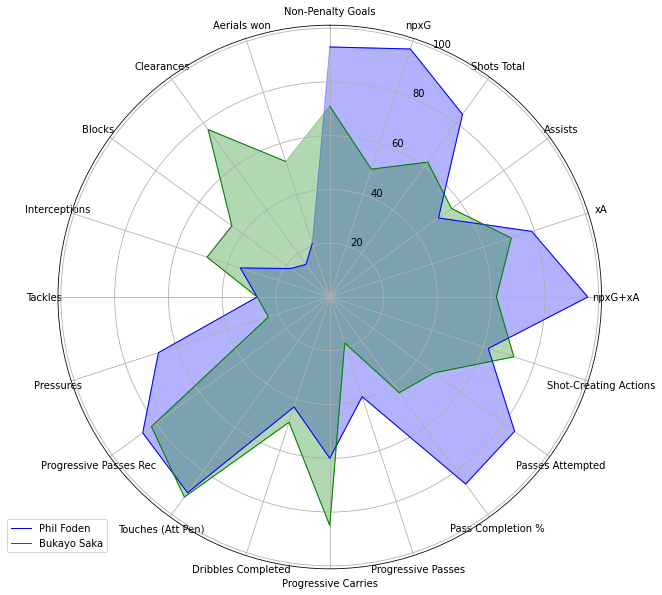

In [33]:
compare_players_percentile(url_list)

In [34]:
def compare_players_percentile_template(url_list, view):
    appended_data = []
    for x in url_list:

        warnings.filterwarnings("ignore")
        
        url = x
        page =requests.get(url)
        soup= BeautifulSoup(page.content, 'html.parser')
        name = [element.text for element in soup.find_all("span")]
        name = name[7]
        
        metric_names = []
        metric_values = []
        
        
        remove_content = ["'", "[", "]", ",", "%"]
        
        for row in soup.findAll('table')[0].tbody.findAll('tr'):
            first_column = row.findAll('th')[0].contents
            metric_names.append(first_column)
            
            
        for row in soup.findAll('table')[0].tbody.findAll('tr'):
            first_column = row.findAll('td')[1].contents
            metric_values.append(first_column)
            
            
        clean_left = []
        splitat_r = 65
        splitat_l = 67

        for item in metric_values:
            item = str(item).strip('[]')
            left, right = item[:splitat_l], item[splitat_r:]
            clean_left.append(left)

        clean_overall= []
        
        for item in clean_left:
            item = str(item).strip('[]')
            left, right = item[:splitat_l], item[splitat_r:]
            clean_overall.append(right)
        
        clean = []
        
        for item in clean_overall:
            item = item.replace("<","")
            clean.append(item)
            
        metric_names  = [item for sublist in metric_names  for item in sublist]

        clean = list(filter(None, clean))

            
        df_player = pd.DataFrame()
        
        
        df_player['Name'] = name[0]
        for item in metric_names:
            df_player[item] = []


        name = name
        non_penalty_goals = (clean[0])
        npx_g = clean[1]
        shots_total = clean[2]
        assists = clean[3]
        x_a = clean[4]
        npx_g_plus_x_a = clean[5] 
        shot_creating_actions = clean[6] 
        passes_attempted = clean[7] 
        pass_completion_percent = clean[8] 
        progressive_passes = clean[9] 
        progressive_carries = clean[10] 
        dribbles_completed = clean[11] 
        touches_att_pen = clean[12]
        progressive_passes_rec = clean[13] 
        pressures = clean[14] 
        tackles = clean[15] 
        interceptions = clean[16] 
        blocks = clean[17]
        clearances = clean[18]
        aerials_won = clean[19]
        df_player.loc[0] = [name, non_penalty_goals, npx_g, shots_total, assists, x_a, npx_g_plus_x_a, shot_creating_actions, passes_attempted, pass_completion_percent,
                            progressive_passes, progressive_carries, dribbles_completed, touches_att_pen, progressive_passes_rec, pressures, tackles, interceptions, blocks,
                            clearances, aerials_won]
        appended_data.append(df_player)

    df_player_comp = pd.concat(appended_data)

    df_player_comp[['Non-Penalty Goals', 'npxG', 'Shots Total', 'Assists', 'xA',
            'npxG+xA', 'Shot-Creating Actions', 'Passes Attempted',
            'Pass Completion %', 'Progressive Passes', 'Progressive Carries',
            'Dribbles Completed', 'Touches (Att Pen)', 'Progressive Passes Rec',
            'Pressures', 'Tackles', 'Interceptions', 'Blocks', 'Clearances',
            'Aerials won']] = df_player_comp[['Non-Penalty Goals', 'npxG', 'Shots Total', 'Assists', 'xA',
            'npxG+xA', 'Shot-Creating Actions', 'Passes Attempted',
            'Pass Completion %', 'Progressive Passes', 'Progressive Carries',
            'Dribbles Completed', 'Touches (Att Pen)', 'Progressive Passes Rec',
            'Pressures', 'Tackles', 'Interceptions', 'Blocks', 'Clearances',
            'Aerials won']].apply(pd.to_numeric)
        
    categories = ['Non-Penalty Goals', 'npxG', 'Shots Total', 'Assists', 'xA',
        'npxG+xA', 'Shot-Creating Actions', 'Passes Attempted',
        'Pass Completion %', 'Progressive Passes', 'Progressive Carries',
        'Dribbles Completed', 'Touches (Att Pen)', 'Progressive Passes Rec',
        'Pressures', 'Tackles', 'Interceptions', 'Blocks', 'Clearances',
        'Aerials won']

    attacking_cats = ["Name",'Non-Penalty Goals', 'npxG', 'Shots Total','xA','npxG+xA', 'Shot-Creating Actions']

    Playmaking_cats = ["Name",'Assists','Dribbles Completed',
            'Touches (Att Pen)', 'Progressive Passes Rec','Passes Attempted',
        'Pass Completion %', 'Progressive Passes', 'Progressive Carries']

    defensive_cats = ["Name", 'Aerials won','Pressures', 'Tackles', 'Interceptions', 'Blocks']
        

    if view == "Attacking":

        df_player_comp = df_player_comp[attacking_cats]

        df_player_plot_1 = df_player_comp.reset_index(drop=True)

        df_player_plot_1 = df_player_plot_1.iloc[0].values.tolist()
        player_1_name = df_player_plot_1[0]
        del df_player_plot_1[0]

        df_player_plot_2 = df_player_comp.reset_index(drop=True)
        df_player_plot_2 = df_player_plot_2.iloc[1].values.tolist()
        player_2_name = df_player_plot_2[0]
        del df_player_plot_2[0]

        df_player_1_plot = df_player_plot_1

        df_player_2_plot = df_player_plot_2

        df_player_1_plot_numeric = []
            
        for item in df_player_1_plot:
            item = int(item)
            df_player_1_plot_numeric.append(item)
            
        df_player_2_plot_numeric = []

        for item in df_player_2_plot:
            item = int(item)
            df_player_2_plot_numeric.append(item)

        attacking_cats.remove('Name')

        N = len(attacking_cats) 

        angles = [n / float(N) * 2 * pi for n in range(N)]

        plt.figure(figsize=(40,10))

        ax = plt.subplot(111, polar=True)

        ax.set_theta_offset(pi / 2)

        ax.set_theta_direction(-1)

        plt.xticks(angles[:], attacking_cats)

        a = df_player_1_plot_numeric
        b = df_player_2_plot_numeric

        ax.plot(angles, a, linewidth=1, linestyle='solid', label=player_1_name, color ='blue')
        ax.fill(angles, a, 'b', alpha=0.3, color ='blue')

        ax.plot(angles, b, linewidth=1, linestyle='solid', label=player_2_name, color ='green')
        ax.fill(angles, b, 'b', alpha=0.3, color ='green')
            
        plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

        plt.title(f"{view} Radar Template")  

    elif view == "Playmaking":
        
        
        df_player_comp = df_player_comp[Playmaking_cats]

        df_player_plot_1 = df_player_comp.reset_index(drop=True)

        df_player_plot_1 = df_player_plot_1.iloc[0].values.tolist()
        player_1_name = df_player_plot_1[0]
        del df_player_plot_1[0]

        df_player_plot_2 = df_player_comp.reset_index(drop=True)
        df_player_plot_2 = df_player_plot_2.iloc[1].values.tolist()
        player_2_name = df_player_plot_2[0]
        del df_player_plot_2[0]

        df_player_1_plot = df_player_plot_1

        df_player_2_plot = df_player_plot_2

        df_player_1_plot_numeric = []
            
        for item in df_player_1_plot:
            item = int(item)
            df_player_1_plot_numeric.append(item)
            
        df_player_2_plot_numeric = []

        for item in df_player_2_plot:
            item = int(item)
            df_player_2_plot_numeric.append(item)

        Playmaking_cats.remove('Name')

        N = len(Playmaking_cats)

        angles = [n / float(N) * 2 * pi for n in range(N)]

        plt.figure(figsize=(40,10))

        ax = plt.subplot(111, polar=True)

        ax.set_theta_offset(pi / 2)

        ax.set_theta_direction(-1)

        plt.xticks(angles[:], Playmaking_cats)

        a = df_player_1_plot_numeric
        b = df_player_2_plot_numeric

        ax.plot(angles, a, linewidth=1, linestyle='solid', label=player_1_name, color ='blue')
        ax.fill(angles, a, 'b', alpha=0.3, color ='blue')

        ax.plot(angles, b, linewidth=1, linestyle='solid', label=player_2_name, color ='green')
        ax.fill(angles, b, 'b', alpha=0.3, color ='green')
            
        plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

        plt.title(f"{view} Radar Template")  

    elif view == "Defensive":
        df_player_comp = df_player_comp[defensive_cats]

        df_player_plot_1 = df_player_comp.reset_index(drop=True)

        df_player_plot_1 = df_player_plot_1.iloc[0].values.tolist()
        player_1_name = df_player_plot_1[0]
        del df_player_plot_1[0]

        df_player_plot_2 = df_player_comp.reset_index(drop=True)
        df_player_plot_2 = df_player_plot_2.iloc[1].values.tolist()
        player_2_name = df_player_plot_2[0]
        del df_player_plot_2[0]

        df_player_1_plot = df_player_plot_1

        df_player_2_plot = df_player_plot_2

        df_player_1_plot_numeric = []
            
        for item in df_player_1_plot:
            item = int(item)
            df_player_1_plot_numeric.append(item)
            
        df_player_2_plot_numeric = []

        for item in df_player_2_plot:
            item = int(item)
            df_player_2_plot_numeric.append(item)

        defensive_cats.remove('Name')

        N = len(defensive_cats) 

        angles = [n / float(N) * 2 * pi for n in range(N)]

        plt.figure(figsize=(40,10))

        ax = plt.subplot(111, polar=True)

        ax.set_theta_offset(pi / 2)

        ax.set_theta_direction(-1)

        plt.xticks(angles[:], defensive_cats)

        a = df_player_1_plot_numeric
        b = df_player_2_plot_numeric

        ax.plot(angles, a, linewidth=1, linestyle='solid', label=player_1_name, color ='blue')
        ax.fill(angles, a, 'b', alpha=0.3, color ='blue')

        ax.plot(angles, b, linewidth=1, linestyle='solid', label=player_2_name, color ='green')
        ax.fill(angles, b, 'b', alpha=0.3, color ='green')
            
        plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

        ## Title & comment
        plt.title(f"{view} Radar Template")  


    else: 
        print('Please check your spelling. options are: Attacking, Playmaking or Defensive')

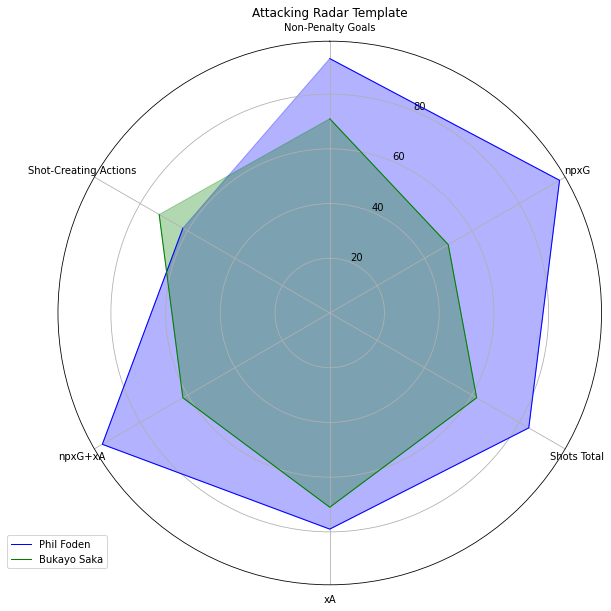

In [35]:
compare_players_percentile_template(url_list,"Attacking")

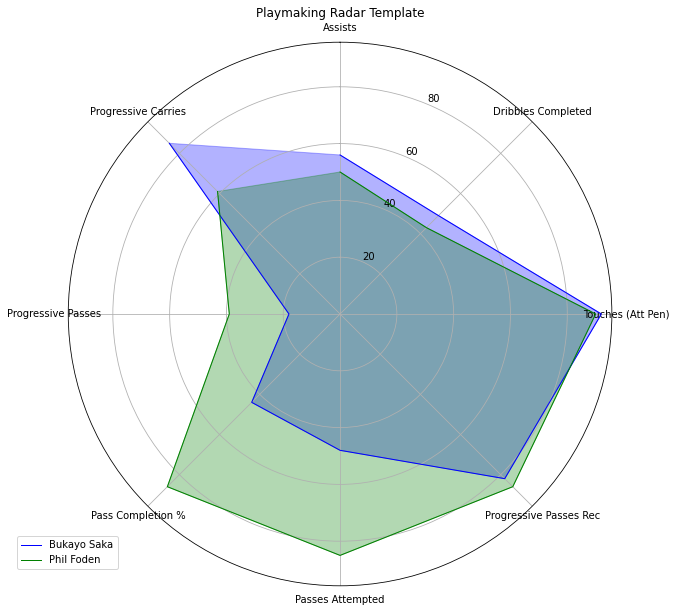

In [18]:
compare_players_percentile_template(url_list,"Playmaking")

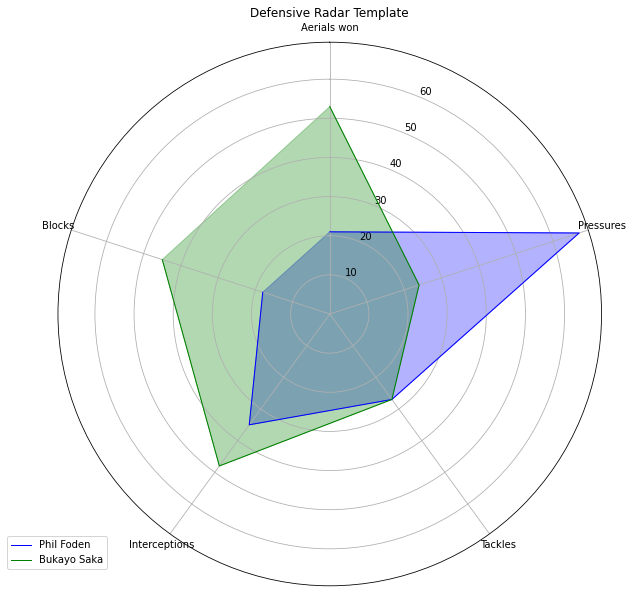

In [36]:
compare_players_percentile_template(url_list,"Defensive")